In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [4]:
figdir = './figures/'
plt.rc('text', usetex=True)

# Carryover of a saddle-node bifurcation
# Application: inflammatory response

## 1. Original system: bifurcation diagrams

The three-variable subsystem is
$$
\begin{aligned}
    \frac{dP}{dt} &= k_{pg}P\left(1 - \frac{P}{p_{\infty}}\right) - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate (add references here in markdown syntax: Segel2013, TysonNovak2011).


We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [11]:
# dynamical system
Pstr = 'k_pg*P*(1 - P/p_inf) - k_pm*s_m*P/(mu_m + k_mp*P) - k_pn*f(N)*P'
Nstr = 's_nr*R(N, P, D)/(mu_nr + R(N, P, D)) - mu_n*N'
Dstr = 'k_dn*f(f_s(N)) - mu_d*D'
fnspecs = {'f': (['V'], 'V/(1 + (C_A/c_inf)**2)'),
          'f_s': (['V'], 'V**6/(x_dn**6 + V**6)'),
          'R': (['N', 'P', 'D'], 'f(k_nn*N + k_np*P + k_nd*D)')}
params = {'k_pg': 2.3,
          'p_inf': 20,
          'k_pm': 0.6,
          's_m': 0.005,
          'mu_m': 0.002,
          'k_mp': 0.01,
          'k_pn': 1.8,
          'C_A': 0.3,
          'c_inf': 0.28,
          's_nr': 0.08,
          'k_nn': 0.01,
          'k_np': 0.1,
          'k_nd': 0.02,
          'mu_nr': 0.12,
          'mu_n': 0.05,
          'k_dn': 0.35,
          'x_dn': 0.06,
          'mu_d': 0.02,
          's_c': 0.0125,
          'k_cn': 0.04,
          'k_cnd': 48.0,
          'mu_c': 0.1}
ics = {'P':  1,
       'N':  0,
       'D':  0}
DSargs = dst.args(name='Inflammatory')
DSargs.pars = params
DSargs.tdata = [0, 100]
DSargs.pdomain = {'k_pg': [0, 4], 
                  'C_A': [0, 2]}
DSargs.xdomain = {'P': [-1e-4, 100], 'N': [0, 10.0], 'D': [0, 10.0]}
DSargs.varspecs = {'P': Pstr, 'N': Nstr, 'D': Dstr}
DSargs.fnspecs = fnspecs
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [12]:
fps = pp.find_fixedpoints(DS, n=5, eps=1e-5)
fps

({'D': 8.14726257046564, 'N': 0.6342702988016385, 'P': 1.7903814247378394e-10},
 {'D': 8.147268334275687, 'N': 1.3155833920827735, 'P': 10.161580486861771})

In [13]:
PC = dst.ContClass(DS)
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['k_pg']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Maximum test function iterations reached.

Neutral saddle found!

BP Point found 
0 : 
D  =  8.147262570431774
N  =  0.6342702988660516
P  =  -8.915027454005459e-104
k_pg  =  2.031521523647816

Eigenvalues = 

     (-0.020000,0.000000)
     (-0.048869,0.000000)
     (1.000000,0.000000)
     (-0.000000,0.000000)


branch angle = 0.9900032868338632
Test function #1: 4.1393786959222225e-19



/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/BifPoint.py:201: LinAlgWarning: Ill-conditioned matrix (rcond=8.72089e-104): result may not be accurate.
  v0 = linalg.solve(r_[c_[J_coords, J_params],


B Point found 
0 : 
D  =  8.147262570431774
N  =  0.6342702988660516
P  =  0.0
k_pg  =  4.137040909350424e-09

B Point found 
0 : 
D  =  8.147262570431774
N  =  0.6342702988660516
P  =  5e-324
k_pg  =  4.000000123286419



In [14]:
name2 = 'EQ2'
PCargs = dst.args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[1]
PCargs.freepars = ['k_pg']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  1.0192684116820305e-17
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
D  =  8.147267774627428
N  =  0.9182912035395542
P  =  1.7507899178934898
k_pg  =  1.011897221834188

Eigenvalues = 

     (-0.020000,0.000000)
     (0.000000,0.076305)
     (0.000000,-0.076305)


w = 0.07630539985106835
l1 = 0.03451822395128222

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
D  =  8.147267326329663
N  =  0.8399766718699416
P  =  1.1352544895499335
k_pg  =  0.984461425402281

Eigenvalues = 

     (-0.020000,0.000000)
     (0.000000,0.000000)
     (0.085843,0.000000)


a = 0.06677739971337951

Neutral saddle found!

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!

BP Point found 
0 : 
D  =  8.147262570458999
N  =  0.634270298

In [98]:
name3 = 'EQ3'
PCargs = dst.args(name=name3)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[2]
PCargs.freepars = ['k_pg']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name3].backward()
PC.curves[name3].forward()

B Point found 
0 : 
D  =  0.18713311693568538
N  =  0.030904595888866515
P  =  0.0
k_pg  =  1.4990000000065369

B Point found 
0 : 
D  =  0.1871331169356853
N  =  0.03090459588886651
P  =  0.0
k_pg  =  1.5009999999920378



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

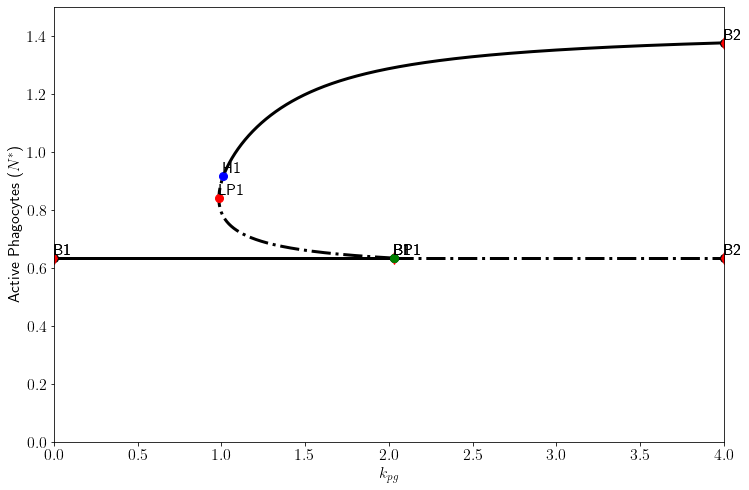

In [22]:
PC[name1].display(('k_pg', 'N'), stability=True, linewidth=3)
PC[name2].display(('k_pg', 'N'), stability=True, linewidth=3)
# PC[name3].display(('k_pg', 'N'), stability=True, linewidth=3)
# PC.plot.fig1.toggleAll('off', bytype=['P','B','MX','RG'])
PC.plot.fig1.axes1.axes.set_xlabel('$k_{pg}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 4))
PC.plot.fig1.axes1.axes.set_ylabel('Active Phagocytes ($N^*$)', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 1.5))
# PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_title('')
plt.show()

In [14]:
# Two-parameter bifurcation
namefold1 = 'FO1'
PCargs = dst.args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold1].forward()
PC.curves[namefold1].backward()

Maximum test function iterations reached.


Checking...
  <b,c> = -0.000009


BT Point found 
0 : 
A  =  0.23255163441451362
P  =  0.8146182320925097
Y  =  0.046804524520920966
m  =  1.751739289117205
k5p  =  0.022145584814709664

Eigenvalues = 

     (-3.730450,0.000000)
     (-0.000002,0.000000)
     (-0.000000,0.000000)


Maximum test function iterations reached.


Checking...
  |a| = -70.261578


CP Point found 
0 : 
A  =  0.4328076857222744
P  =  0.6462762396750428
Y  =  0.05828556736707119
m  =  2.491694483534087
k5p  =  0.03286842896488509

Eigenvalues = 

     (-3.527630,0.000000)
     (0.000000,0.000000)
     (0.934825,0.000000)


Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

ZH Point found 
0 : 
A  =  0.2847554172433855
P  =  0.15378446638113852
Y  =  0.20641489355151582
m  =  0.6408019069660601
k5p  =  0.021192800275191923

Eigenvalues = 

     (-5.791874,0.000000)
     (0.000000,0.000000)
     (0.370903,0.000000)


Test function going crazy:  <PyDS

In [15]:
namefold2 = 'FO2'
PCargs = dst.args(name=namefold2)
PCargs.type = 'H-C1'
PCargs.initpoint = 'EQ1:H1'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold2].forward()
PC.curves[namefold2].backward()

B Point found 
0 : 
A  =  0.408487747138019
P  =  0.07499996346479214
Y  =  0.34782619746002114
m  =  0.6139050836085602
k5p  =  -6.071483174546844e-10

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  2.3822662920467013e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

GH Point found 
0 : 
A  =  0.1917083470903772
P  =  0.07552374926631386
Y  =  0.34624915010150037
m  =  0.3529263221439021
k5p  =  0.013812355667988826

Eigenvalues = 

     (-13.160082,0.000000)
     (0.000000,0.072867)
     (0.000000,-0.072867)


w = 0.0728673643538291
l1 = -1.3972621839108967e-05


Checking...
  <b,c> = -710.166154


BT Point found 
0 : 
A  =  0.151135840078176
P  =  0.07567556134215891
Y  =  0.34579473430592006
m  =  0.3040251443102774
k5p  =  0.012142220072918685

Eigenvalues = 

     (-11.323193,0.000000)
     (-0.000000,0.000013)
     (-0.000000,-0.000013)


B Point found 
0 : 
A  =  -3.476977633762435e-09
P  =  0.07670493457453031
Y  =  0.34274471894292635
m  =  0.1215649184953234
k5p  =  -7.43

In [16]:
namefold3 = 'FO3'
PCargs = dst.args(name=namefold3)
PCargs.type = 'H-C1'
PCargs.initpoint = 'EQ1:H2'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold3].forward()
PC.curves[namefold3].backward()

B Point found 
0 : 
A  =  2.1772207574417997
P  =  0.8173304823588078
Y  =  0.0466564537515876
m  =  12.00000000529808
k5p  =  0.03295352352094834

Maximum test function iterations reached.

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  1.3877787807814457e-17
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

GH Point found 
0 : 
A  =  0.346448215718416
P  =  0.8158162052760037
Y  =  0.046739007456746924
m  =  2.352117103967564
k5p  =  0.031102101724057002

Eigenvalues = 

     (-4.719179,0.000000)
     (0.000000,0.121483)
     (0.000000,-0.121483)


w = 0.12148292425640252
l1 = 0.9051560671045848


Checking...
  <b,c> = 450.207084


BT Point found 
0 : 
A  =  0.2325537954574827
P  =  0.8146179277560481
Y  =  0.04680454118839648
m  =  1.7517505897696088
k5p  =  0.02214577087376129

Eigenvalues = 

     (-3.730463,0.000000)
     (-0.000026,0.000000)
     (0.000026,0.000000)


B Point found 
0 : 
A  =  7.980398561977148e-10
P  =  0.8056705920981216
Y  =  0.04729974102653776
m  =  0.525809

In [17]:
# Two-parameter bifurcation
namefold4 = 'FO4'
PCargs = dst.args(name=namefold4)
PCargs.type = 'H-C1'
PCargs.initpoint = 'EQ1:H3'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold4].forward()
PC.curves[namefold4].backward()

B Point found 
0 : 
A  =  2.1772207579801237
P  =  0.817330482387589
Y  =  0.0466564537500213
m  =  12.000000008178315
k5p  =  0.0329535235631606

Maximum test function iterations reached.

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  1.5265566588595902e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

GH Point found 
0 : 
A  =  0.34682598132050785
P  =  0.8158195167630519
Y  =  0.04673882660597781
m  =  2.3541084763490168
k5p  =  0.031128133085509734

Eigenvalues = 

     (-4.722470,0.000000)
     (0.000000,0.121741)
     (0.000000,-0.121741)


w = 0.12174126594260744
l1 = 0.5533509759168425


Checking...
  <b,c> = -10.657756


BT Point found 
0 : 
A  =  0.23255378980362185
P  =  0.8146179276611631
Y  =  0.04680454119359301
m  =  1.7517505599616843
k5p  =  0.022145770382990895

Eigenvalues = 

     (-3.730463,0.000000)
     (-0.000035,0.000000)
     (0.000035,0.000000)


B Point found 
0 : 
A  =  7.978391629732369e-10
P  =  0.8056705921048342
Y  =  0.04729974102616231
m  =  0.525

In [18]:
namefold5 = 'FO5'
PCargs = dst.args(name=namefold5)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP3'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold5].forward()
PC.curves[namefold5].backward()

B Point found 
0 : 
A  =  2.184114872108471
P  =  0.8024420822147471
Y  =  0.04748100889599624
m  =  11.999999987838244
k5p  =  0.03268570988489322

B Point found 
0 : 
A  =  1.7235268991814698
P  =  0.7467672022089316
Y  =  0.050840960181990046
m  =  9.323925751604023
k5p  =  -4.406387307405697e-11



In [19]:
namefold6 = 'FO6'
PCargs = dst.args(name=namefold6)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP4'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold6].forward()
PC.curves[namefold6].backward()

B Point found 
0 : 
A  =  2.9980369443271577
P  =  0.04023646684357683
Y  =  0.4985264378350693
m  =  3.3989851292302915
k5p  =  0.1000000027453241

B Point found 
0 : 
A  =  1.9902525282736738
P  =  0.04089725221222274
Y  =  0.4944543715164211
m  =  2.293501955019232
k5p  =  -2.751061689954999e-10



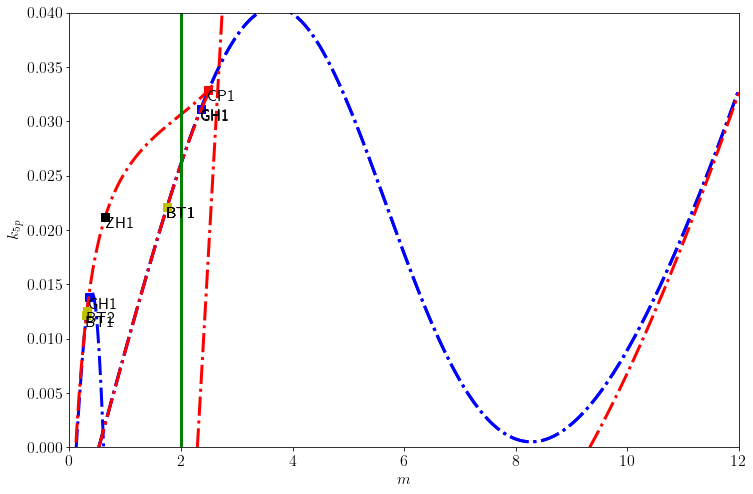

In [21]:
PC[namefold2].display(('m', 'k5p'), stability=True, linewidth=3)
PC[namefold3].display(('m', 'k5p'), stability=True, linewidth=3)
PC[namefold4].display(('m', 'k5p'), stability=True, linewidth=3)
PC[namefold5].display(('m', 'k5p'), stability=True, linewidth=3)
PC[namefold6].display(('m', 'k5p'), stability=True, linewidth=3)
PC[namefold1].display(('m', 'k5p'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['B', 'P'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 12.0))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.04))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{5p}$', fontsize=16)
plt.axvline(x=2.0, lw=3, color='g')
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleOriginalTwoParameterBifurcationFull.png', bbox_inches='tight')
plt.show()

In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [4]:
figdir = './figures/'
plt.rc('text', usetex=True)

## 2. Extended system: bifurcation diagram

**In order to run the following lines, we nee to restart the notebook, otherwise, the continuation of the limit cycle would not work. Supposedly, building AUTO for two system will collide.**

The cell cycle model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A, \\
    \frac{dm}{dt} &= \mu m \left( 1 - \frac{m}{K}\right),
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate.


We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [5]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
mstr = 'mu*m*(1 - m/K)'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'mu': 0.1,
          'K': 2.0,
          'n': 4}
ics = {'A':  0.8850704900359198,
'P':  0.9854966451671725,
'Y':  0.03899139282479138,
'm':  2.0}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 100]
DSargs.pdomain = {'mu': [0, 1.0],
                  'K': [1.0, 5.0],
                  'k1': [0, 1.0], 
                  'k2p': [0, 10.0], 
                  'k3p': [0, 10.0], 
                  'k4': [0, 200.0], 
                  'k5p': [0, 0.04], 
                  'k5pp': [0, 10.0],
                  'k6': [0, 10.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0], 'm': [0, 2.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr, 'm': mstr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

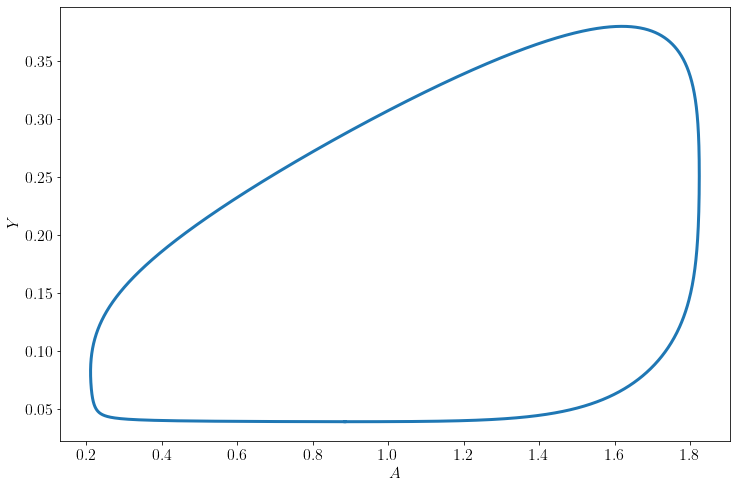

In [6]:
traj = DS.compute('cycle')
cycle = traj.sample(dt=0.0001, tlo=0, thi=53.32, precise=True)
cycle.indepvararray = cycle.indepvararray.flatten()
plt.plot(cycle['A'], cycle['Y'])
plt.xlabel('$A$')
plt.ylabel('$Y$')
plt.show()

In [7]:
PC = dst.ContClass(DS)
name3 = 'LC2'
PCargs = dst.args(name=name3)
PCargs.type = 'LC-C'
PCargs.initcycle = cycle
PCargs.freepars = ['k5p']
PCargs.StepSize = 2e-2
PCargs.MaxNumPoints = 50000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.MaxTestIters = 1000
PCargs.SolutionMeasures = 'min'
PCargs.NumSPOut = 40
PCargs.SaveEigen = True
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name3].backward()
PC.curves[name3].forward()

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_CellCycle_vf" sources
swig: /home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp/auto_CellCycle_vf.i
swig -python -I/home/shigoto/.local/lib/python3.8/site-packages/numpy/core/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/module/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.linux-x86_64-3.8/auto_temp/auto_CellCycle_vf_wrap.c -outdir auto_temp/src.linux-x86_64-3.8/auto_

In [8]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.051215411878439525,
  'P': 1.6581629493592063,
  'Y': 0.02355486557700103,
  'm': 2.0},
 {'A': 0.05000000000000002,
  'P': 0.9999999999999956,
  'Y': 0.03846153846154625,
  'm': -1.583327336586685e-19},
 {'A': 0.7127848739479983,
  'P': 0.277816108256646,
  'Y': 0.12585894471937878,
  'm': 2.0},
 {'A': 0.055562950271203844,
  'P': 1.120372749494177,
  'Y': 0.034471681636286694,
  'm': 2.0})

In [9]:
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[2]
PCargs.freepars = ['k5p']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.42325685315315825
P  =  0.49418945769437567
Y  =  0.07487980046001787
m  =  2.0
k5p  =  0.030631818510688053

Eigenvalues = 

     (-3.262166,0.000000)
     (-0.000000,0.000000)
     (1.190667,0.000000)
     (-0.100000,0.000000)


a = 0.1897815445176204


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
A  =  0.2803176459936144
P  =  0.8061908131345967
Y  =  0.04727066210022481
m  =  2.0
k5p  =  0.02607846297252048

Eigenvalues = 

     (-3.979172,0.000000)
     (0.000000,0.000000)
     (0.065326,0.000000)
     (-0.100000,0.000000)


a = 4.20609782177662

B Point found 
0 : 
A  =  0.41026470315076313
P  =  0.9550179096429889
Y  =  0.04020028143448387
m  =  2.0
k5p  =  0.03999999941772164

B Point found

In [10]:
name2 = 'EQ2'
PCargs = dst.args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['k5p']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
A  =  0.00019426821331178064
P  =  2.6460568996415366
Y  =  0.014891717299562098
m  =  2.0
k5p  =  -7.1106153670900636e-12

Neutral saddle found!

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000004

LP Point found 
0 : 
A  =  0.07661331695998193
P  =  1.2629326875349751
Y  =  0.030699974283150574
m  =  2.0
k5p  =  0.0073110191871714044

Eigenvalues = 

     (-2.835345,0.000000)
     (-0.039687,0.000000)
     (-0.000000,0.000000)
     (-0.100000,0.000000)


a = 6.43066659482632

B Point found 
0 : 
A  =  0.006609306830907341
P  =  1.0712910661422828
Y  =  0.03599417040114912
m  =  2.0
k5p  =  -2.265097847256428e-10



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

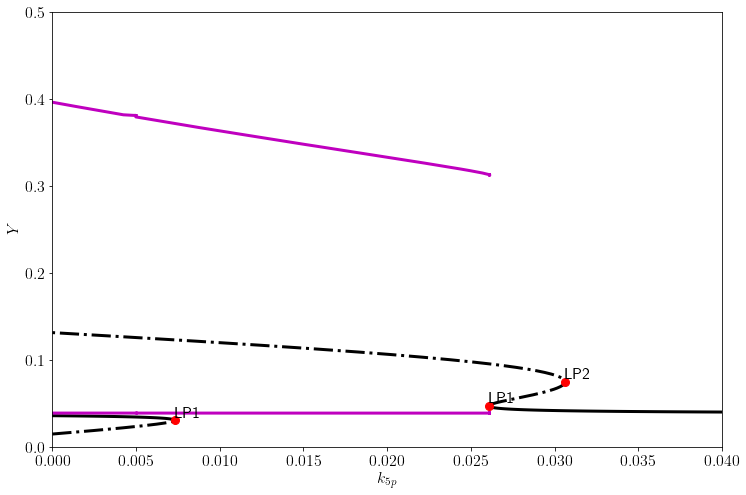

In [11]:
PC[name1].display(('k5p', 'Y'), stability=True, linewidth=3)
PC[name2].display(('k5p', 'Y'), stability=True, linewidth=3)
PC[name3].display(('k5p', 'Y_min'), stability=True, linewidth=3)
PC[name3].display(('k5p', 'Y_max'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P', 'B', 'MX', 'RG'])
PC.plot.fig1.axes1.axes.set_xlabel('$k_{5p}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 0.04))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.5))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleExtendedlBifurcationFull.png', bbox_inches='tight')
plt.show()

Same diagram as before.